## Where are the tracers going? (Astoria)


In [1]:
#import gsw as sw # Gibbs seawater package
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('white')

In [4]:
def plot_transports(dfcan, dfdif, dfcan2, tr, bat, units):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
    
    ax0.axhline(0, color='gold')
    # Tracers
    vertical =  dfcan.Vert_adv_trans_sb #(dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)   
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/1E5,':',color='k')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS1_adv_trans )/1E5,color='0.4')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS2_adv_trans )/1E5,color='0.6')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans )/1E5,color='0.8')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans )/1E5,':',color='0.5')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS5_adv_trans )/1E5,color='k')
    ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS6_adv_trans )/1E5,'--',color='k')

    total = ( (dfcan.CS1_adv_trans ) +
              (dfcan.CS2_adv_trans ) +
              (dfcan.CS3_adv_trans ) +
              (dfcan.CS4_adv_trans ) +
              (dfcan.CS5_adv_trans ) +
              (dfcan.CS6_adv_trans ) +
               vertical)

    ax0.plot(np.arange(1,19,1)/2.0,total/1E5,'--',color='green')
    ax0.set_xlabel('Days',labelpad=0.5)
    ax0.set_ylabel(units,labelpad=0.5)
    ax0.set_title('%s transports %s' %(tr, bat))

    # Water
    ax1.axhline(0, color='gold')
    ax1.plot(np.arange(19)/2.0,(dfcan2.Vert_water_trans_sb)/1E4,':',color='k',label = 'LID')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS1_water_trans)/1E4,color='0.4',label = 'CS1')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS2_water_trans)/1E4,color='0.6',label = 'CS2')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS3_water_trans)/1E4,color='0.8',label = 'CS3')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS4_water_trans)/1E4,':',color='0.5',label= 'CS4')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS5_water_trans)/1E4,color='k',label = 'CS5')
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS6_water_trans)/1E4,'--',color='k',label = 'CS6')
 
    total2 = (dfcan2.CS1_water_trans +
              dfcan2.CS2_water_trans +
              dfcan2.CS3_water_trans +
              dfcan2.CS4_water_trans +
              dfcan2.CS5_water_trans +
              dfcan2.CS6_water_trans +
              dfcan2.Vert_water_trans_sb)

    ax1.plot(np.arange(19)/2.0,total2/1E4,'--',color='green',label = 'Total')
    ax1.set_xlabel('Days',labelpad=0.5)
    ax1.set_ylabel('(10$^{4}$ m$^3$s$^{-1}$)',labelpad=-4)
    ax1.set_title('Water transports %s' %bat)
    ax1.legend(bbox_to_anchor=(1,1))
    ax1.set_ylim(-25,15)
def tot_trans(dfcan, dfdif):
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)   
    total = ( (dfcan.CS1_adv_trans ) +
              (dfcan.CS2_adv_trans ) +
              (dfcan.CS3_adv_trans ) +
              (dfcan.CS4_adv_trans ) +
              (dfcan.CS5_adv_trans ) +
              (dfcan.CS6_adv_trans ) +
               vertical)
    return(total)

def plotCSPos(ax,CS1,CS2,CS3,CS4,CS5,CS6):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    ax.axvline(CS5,color='k',linestyle=':')
    ax.axvline(CS6,color='k',linestyle=':')
 

In [5]:
#Exp
Grid = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc' 
GridOut = Dataset(Grid)

GridNoC = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/gridGlob.nc' 
GridNoCOut = Dataset(GridNoC)

State = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc' 
StateNoC = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/stateGlob.nc' 

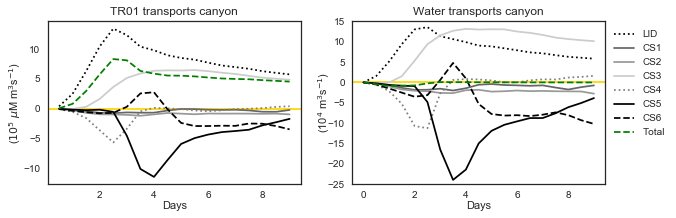

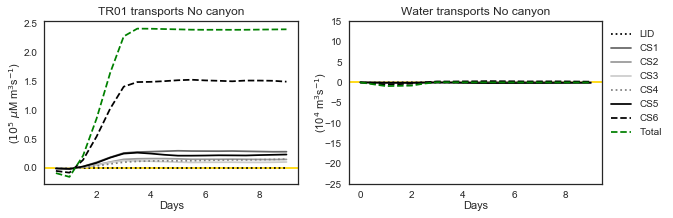

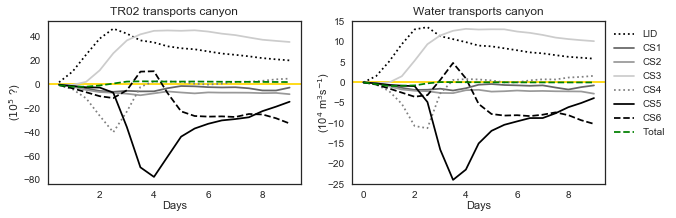

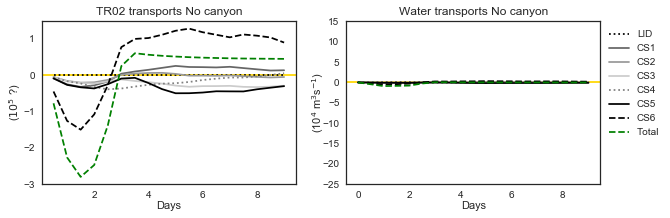

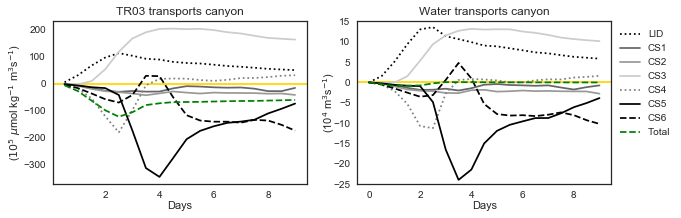

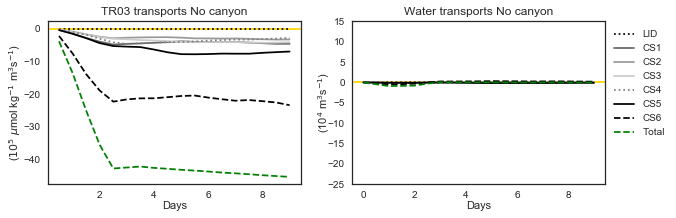

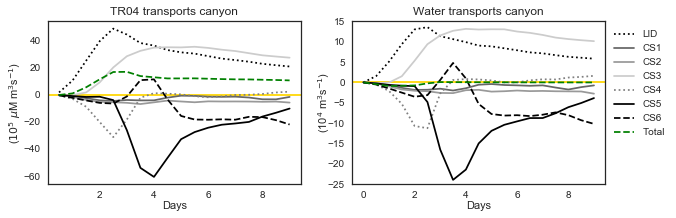

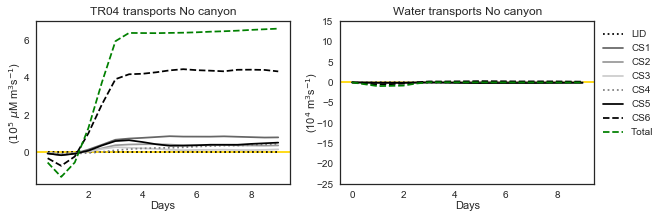

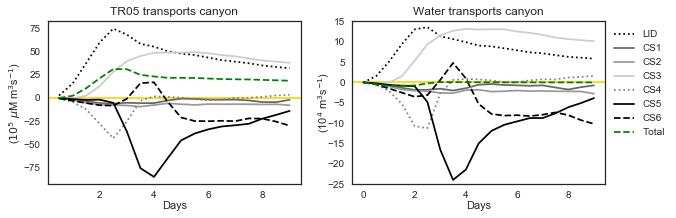

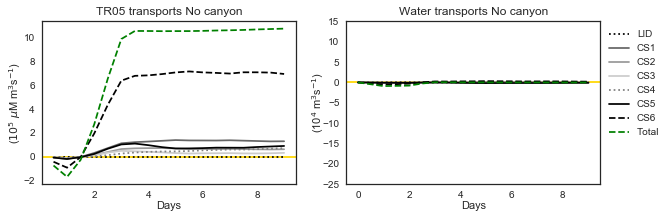

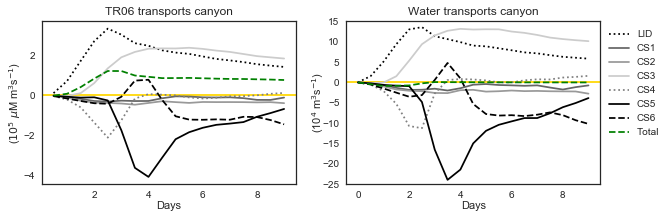

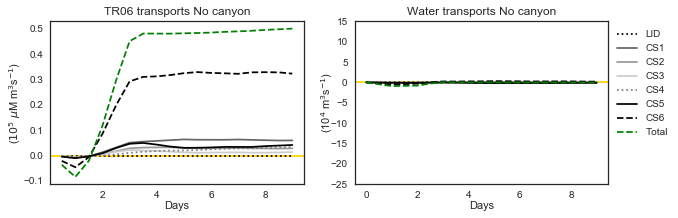

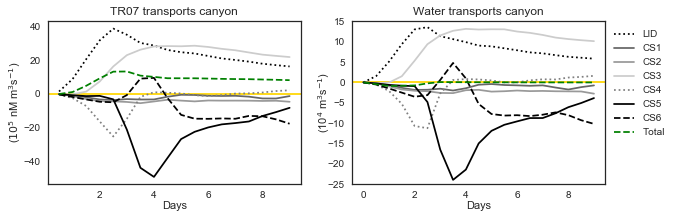

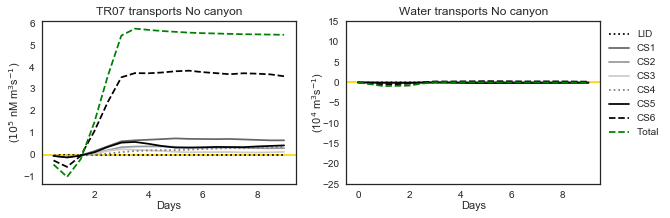

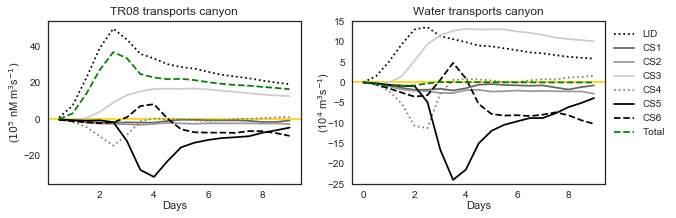

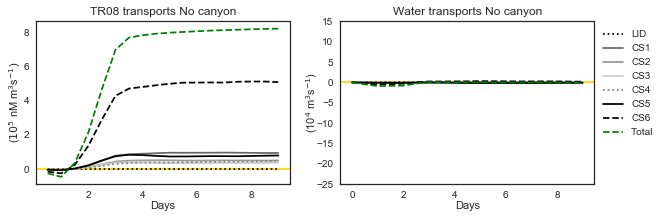

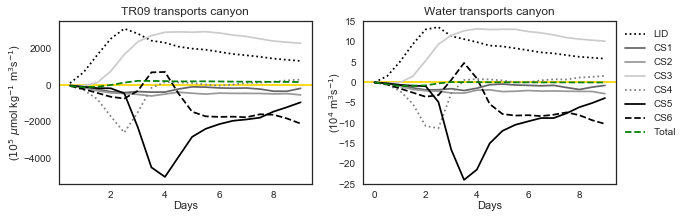

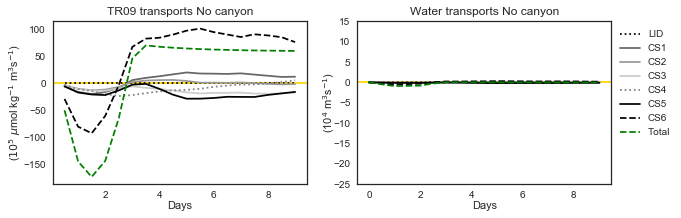

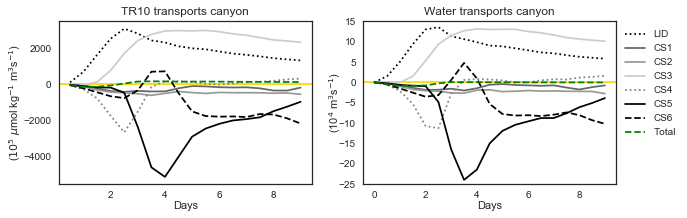

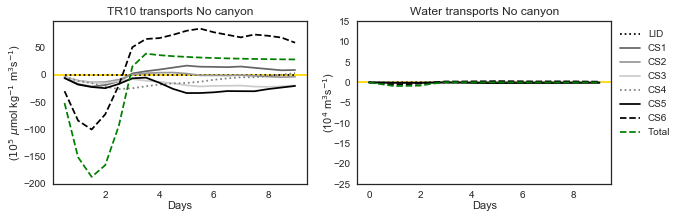

In [6]:
# Water
file2 = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/water_CS_transports.nc')
fileNoC2 = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/water_CS_transports.nc')
dfcan2 = xr.open_dataset(file2)
dfnoc2 = xr.open_dataset(fileNoC2)

units = ['($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ ?)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ nM m$^3$s$^{-1}$)',
         '($10^5$ nM m$^3$s$^{-1}$)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)']
tracers = ['TR01', 'TR02','TR03','TR04','TR05','TR06','TR07','TR08','TR09', 'TR10']

for tr, unit in zip(tracers, units):
    # Tracers
    file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/adv%s_CS_transports.nc' %tr)
    filedif = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/dif%s_CS_transports.nc' %tr)
    fileNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/adv%s_CS_transports.nc' %tr)
    filedifNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/dif%s_CS_transports.nc' %tr)

    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)
    dfnocdif = xr.open_dataset(filedifNoC)
 
    plot_transports(dfcan,dfdif,dfcan2, tr, 'canyon', unit)
    plot_transports(dfnoc,dfnocdif,dfnoc2, tr, 'No canyon', unit)
    

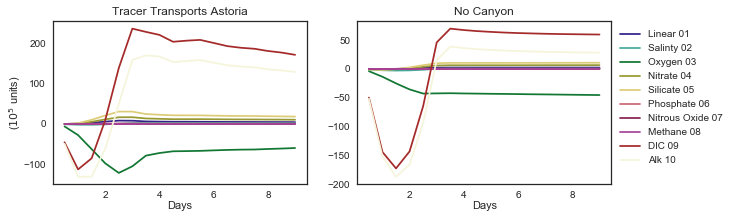

In [7]:
tracers = ['TR01', 'TR02','TR03','TR04','TR05','TR06','TR07','TR08', 'TR09', 'TR10']
factors = [1,1,1,1,1,1,1E-3,1E-3,1,1]
labels = ['Linear 01','Salinty 02','Oxygen 03','Nitrate 04','Silicate 05',
          'Phosphate 06','Nitrous Oxide 07','Methane 08','DIC 09', 'Alk 10']
colours = ['#332288','#44AA99','#117733','#999933','#DDCC77','#CC6677','#882255','#AA4499','brown','beige']

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))

  
for tr, fact, col, lab in zip(tracers, factors, colours, labels):
    file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/adv%s_CS_transports.nc' %tr)
    filedif = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/dif%s_CS_transports.nc' %tr)
    fileNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/adv%s_CS_transports.nc' %tr)
    filedifNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/dif%s_CS_transports.nc' %tr)

    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)
    dfnocdif = xr.open_dataset(filedifNoC)
 
    ax0.plot(np.arange(1,19,1)/2.0,tot_trans(dfcan,dfdif)*fact/1E5,color=col, label=lab)
    ax1.plot(np.arange(1,19,1)/2.0,tot_trans(dfnoc,dfnocdif)*fact/1E5, color=col, label=lab)

ax0.set_xlabel('Days',labelpad=0.5)
ax1.set_xlabel('Days',labelpad=0.5)
ax0.set_ylabel('($10^5$ units)',labelpad=0.5)
ax0.set_title('Tracer Transports Astoria')
ax1.set_title('No Canyon')
ax1.legend(bbox_to_anchor=(1,1))



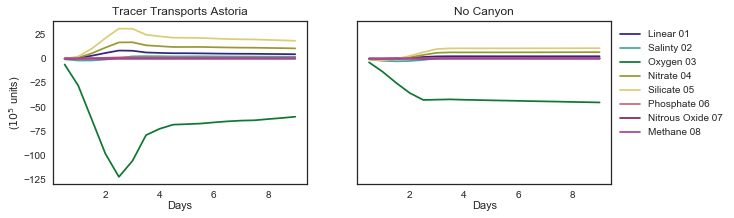

In [8]:
tracers = ['TR01', 'TR02','TR03','TR04','TR05','TR06','TR07','TR08']
factors = [1,1,1,1,1,1,1E-3,1E-3,1,1]
labels = ['Linear 01','Salinty 02','Oxygen 03','Nitrate 04','Silicate 05','Phosphate 06','Nitrous Oxide 07','Methane 08']
colours = ['#332288','#44AA99','#117733','#999933','#DDCC77','#CC6677','#882255','#AA4499']

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3), sharey=True)

  
for tr, fact, col, lab in zip(tracers, factors, colours, labels):
    file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/adv%s_CS_transports.nc' %tr)
    filedif = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/dif%s_CS_transports.nc' %tr)
    fileNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/adv%s_CS_transports.nc' %tr)
    filedifNoC = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/dif%s_CS_transports.nc' %tr)

    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)
    dfnocdif = xr.open_dataset(filedifNoC)
 
    ax0.plot(np.arange(1,19,1)/2.0,tot_trans(dfcan,dfdif)*fact/1E5,color=col, label=lab)
    ax1.plot(np.arange(1,19,1)/2.0,tot_trans(dfnoc,dfnocdif)*fact/1E5, color=col, label=lab)

ax0.set_xlabel('Days',labelpad=0.5)
ax1.set_xlabel('Days',labelpad=0.5)
ax0.set_ylabel('($10^5$ units)',labelpad=0.5)
ax0.set_title('Tracer Transports Astoria')
ax1.set_title('No Canyon')
ax1.legend(bbox_to_anchor=(1,1))



### Slices - Mean transport days 5 to 9

In [9]:
t_slice = slice(10,20)
x_slice = slice(0,616)
x_slice_vert = slice(120,240)
y_slice_vert = slice(130,230)
z_slice = slice(0,80)
z_slice_zoom = slice(0,30)
y_ind = 130 # sb index
z_ind = 30 # sb index

In [10]:
def plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, z_slice_zoom, y_ind, z_ind,
                  grid,Flux,FluxV,unit):
    plt.rcParams['font.size'] = 8.0
    f = plt.figure(figsize = (12.5,4.5))

    gs = gspec.GridSpec(1, 2, width_ratios=[1,0.3])
    gs1 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0],hspace=0.15,wspace=0.15,height_ratios=[1,1])

    ax2 = plt.subplot(gs1[0],xticks=[])
    ax3 = plt.subplot(gs1[1])
    ax4 = plt.subplot(gs[1])


    areas = (np.expand_dims(grid.dxF.isel(X=x_slice,Y=y_ind).data,0))*(np.expand_dims(grid.drF.isel(Z=z_slice).data,1))

    # Full shelf ---------------------------------------------------------------------------
    cnt=ax3.contourf(grid.X.isel(X=x_slice)/1000,
                     grid.Z.isel(Z=z_slice),
                     Flux.isel(Zmd000104=z_slice,X=x_slice)/areas,
                     16,cmap=cmo.cm.tarn,
                     vmax=np.max(Flux.isel(Zmd000104=z_slice,X=x_slice)/areas), 
                     vmin=-np.max(Flux.isel(Zmd000104=z_slice,X=x_slice)/areas))
    ax3.contourf(grid.X.isel(X=x_slice)/1000,
                 grid.Z.isel(Z=z_slice),
                 grid.HFacC.isel(Z=z_slice,Y=y_ind,X=x_slice),
                 [0,0.1], colors='#a99582')

    cbar_ax = f.add_axes([0.65, 0.126, 0.02, 0.355])
    cb=f.colorbar(cnt, cax=cbar_ax)
    cb.ax.xaxis.set_tick_params(pad=1.5)

    ax3.axhline(y=grid.Z[z_ind], linestyle=':',color='k')
    ax3.set_xlabel('Alongshelf distance / km',labelpad=0.5)
    ax3.set_ylabel('Depth / m',labelpad=0.5)

    ax3.text(0.87,0.9,'%s' %unit,transform=ax3.transAxes)
    ax3.set_facecolor('#a99582')     

    # Zoom shelf   ---------------------------------------------------------------------------
    cnt = ax2.contourf(grid.X.isel(X=x_slice)/1000,
                       grid.Z.isel(Z=z_slice_zoom),
                       Flux.isel(Zmd000104=z_slice_zoom, X=x_slice)/areas[z_slice_zoom,:],
                       16,cmap=cmo.cm.tarn,
                       vmax=np.max(Flux.isel(Zmd000104=z_slice_zoom,X=x_slice)/areas[z_slice_zoom,:]), 
                       vmin=-np.max(Flux.isel(Zmd000104=z_slice_zoom,X=x_slice)/areas[z_slice_zoom,:]))
    ax2.contourf(grid.X.isel(X=x_slice)/1000,
                 grid.Z.isel(Z=z_slice_zoom),
                 grid.HFacC.isel(Z=z_slice_zoom,Y=y_ind,X=x_slice),
                 [0,0.1], colors='#a99582')

    cbar_ax2 = f.add_axes([0.65, 0.53, 0.02, 0.348])
    cb2=f.colorbar(cnt, cax=cbar_ax2)
    cb2.ax.yaxis.set_tick_params(pad=1.5)

    ax2.set_ylabel('Depth / m',labelpad=0.5)
    ax2.text(0.87,0.9,'%s' %unit,transform=ax2.transAxes)    

    # Vertical section ---------------------------------------------------------------------------
    cnt=ax4.contourf(grid.X.isel(X=x_slice_vert)/1000,
                     grid.Y.isel(Y=y_slice_vert)/1000,
                     100*(FluxV.isel(X=x_slice_vert,Y=y_slice_vert).data)/(grid.rA[y_slice_vert,x_slice_vert]),
                     16,cmap=cmo.cm.tarn,
                     vmax= np.max(100*(FluxV.isel(X=x_slice_vert,Y=y_slice_vert).data)/(grid.rA[y_slice_vert,x_slice_vert])),
                     vmin=-np.max(100*(FluxV.isel(X=x_slice_vert,Y=y_slice_vert).data)/(grid.rA[y_slice_vert,x_slice_vert])))
    ax4.contourf(grid.X.isel(X=x_slice_vert)/1000, 
                 grid.Y.isel(Y=y_slice_vert)/1000,
                 grid.HFacC.isel(Z=z_ind,X=x_slice_vert,Y=y_slice_vert),
                 [0,0.1], colors='#a99582')

    cbar_ax3 = f.add_axes([0.737, 0.16, 0.17, 0.03])
    cb3=f.colorbar(cnt, cax=cbar_ax3, orientation='horizontal')#,ticks=[-2,-1,0,1,2,3,4])
    cb3.ax.yaxis.set_tick_params(pad=1.5)

    ax4.set_aspect(1)
    ax4.set_xlabel('Alongshelf distance / km',labelpad=0.5)
    ax4.set_ylabel('C-S / km',labelpad=0.5)
    ax4.text(0.6,0.85,'$10^{-2}$ %s' %unit,transform=ax4.transAxes)    
    #ax4.set_yticks([52,54,56,58,60])

    # General looks
    #ax0.text(0.5,0.1,'(a) Tracer transport',transform=ax0.transAxes)
    #ax1.text(0.5,0.1,'(b) Water transport',transform=ax1.transAxes)    
    #ax2.text(0.01,0.85,'(c)',transform=ax2.transAxes)
    #ax3.text(0.01,0.85,'(d)',transform=ax3.transAxes)    
    #ax4.text(0.02,0.85,'(e) LID',transform=ax4.transAxes)    

    #ax2.text(0.24,0.85,'CS2',transform=ax2.transAxes)
    #ax2.text(0.5,0.85,'CS3',transform=ax2.transAxes)
    #ax2.text(0.7,0.85,'CS4',transform=ax2.transAxes)


    plotCSPos(ax2,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000,grid.X[615]/1000)
    plotCSPos(ax3,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000,grid.X[615]/1000)

    #ax2.set_ylim(0,2.2)
    #ax3.set_ylim(0,15)
    ax3.tick_params(axis='x', pad=1)
    ax4.tick_params(axis='x', pad=1)

    ax2.tick_params(axis='y', pad=3)
    ax3.tick_params(axis='y', pad=3)
    ax4.tick_params(axis='y', pad=3)

    ax2.set_xlim(0,150)
    ax3.set_xlim(0,150)

Linear


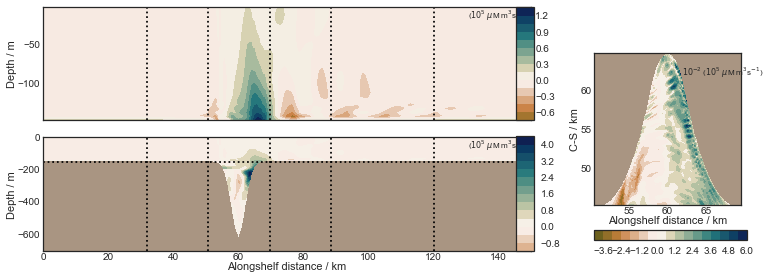

In [11]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR01Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr01[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr01[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr01[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr01[t_slice,z_ind,:,:]+flux.DFrETr01[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV, units[0])
print('Linear')

Salt


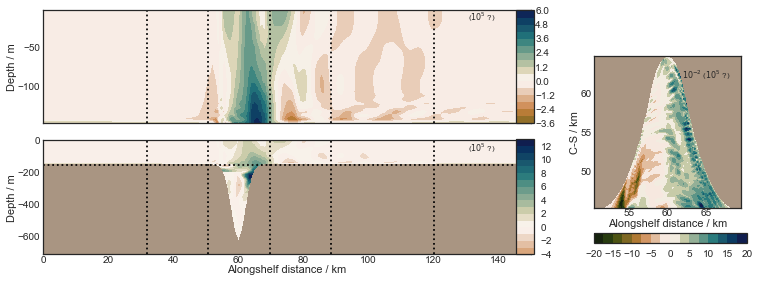

In [12]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR02Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr02[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr02[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr02[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr02[t_slice,z_ind,:,:]+flux.DFrETr02[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[1])
print('Salt')

Oxygen


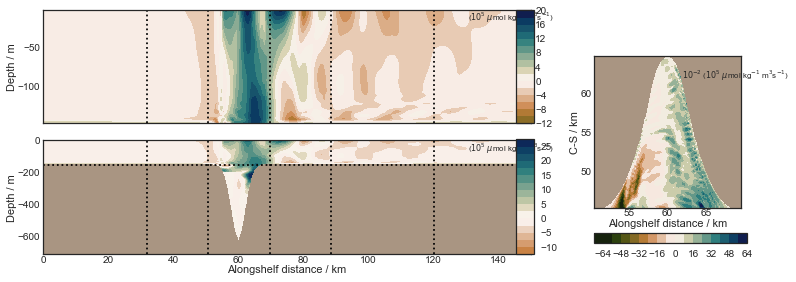

In [13]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR03Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr03[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr03[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr03[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr03[t_slice,z_ind,:,:]+flux.DFrETr03[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV, units[2])
print('Oxygen')

Nitrate


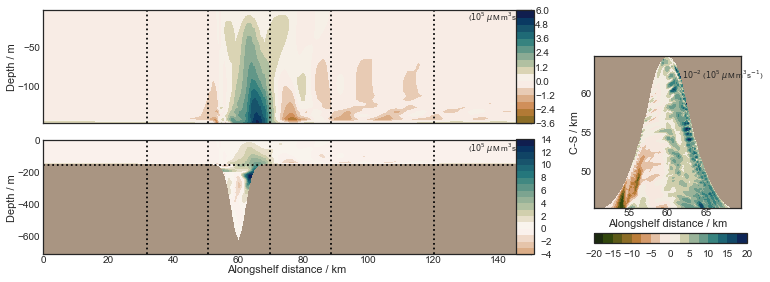

In [14]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR04Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr04[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr04[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr04[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr04[t_slice,z_ind,:,:]+flux.DFrETr04[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[3])
print('Nitrate')

Silicate


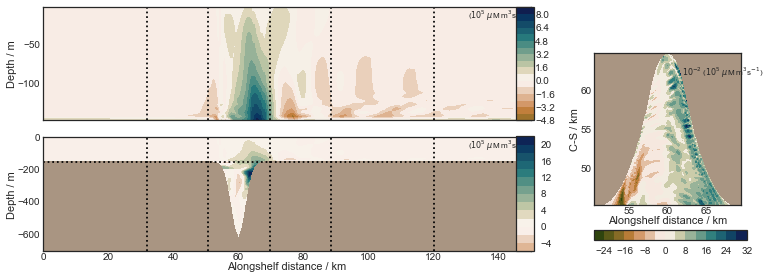

In [15]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR05Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr05[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr05[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr05[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr05[t_slice,z_ind,:,:]+flux.DFrETr05[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[4])
print('Silicate')

Phosphate


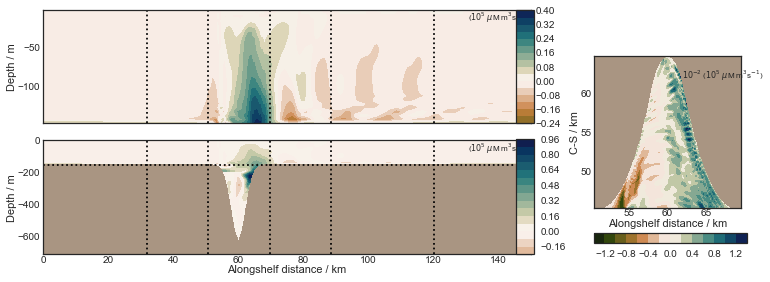

In [16]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR06Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr06[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr06[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr06[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr06[t_slice,z_ind,:,:]+flux.DFrETr06[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV, units[5])
print('Phosphate')

Nitrous Oxide


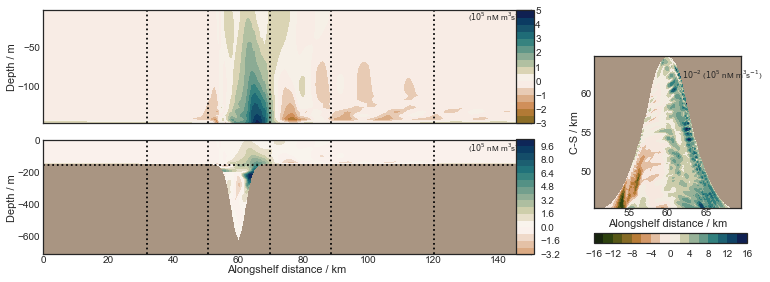

In [17]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR07Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr07[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr07[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr07[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr07[t_slice,z_ind,:,:]+flux.DFrETr07[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[6])
print('Nitrous Oxide')

Methane


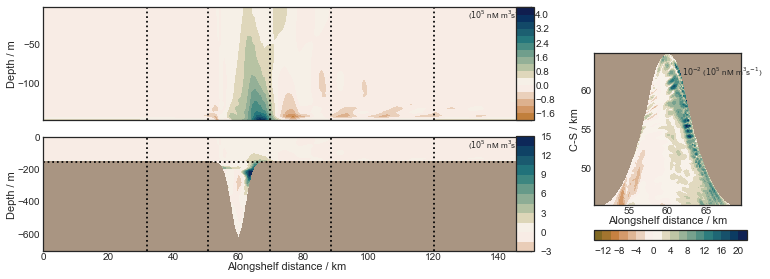

In [18]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR08Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr08[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr08[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr08[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr08[t_slice,z_ind,:,:]+flux.DFrETr08[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[7])
print('Methane')

In [19]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR09Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr08[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr08[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr08[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr08[t_slice,z_ind,:,:]+flux.DFrETr08[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[8])
print('DIC')

AttributeError: 'Dataset' object has no attribute 'ADVyTr08'

In [ ]:
grid = xr.open_dataset(Grid)

flux_file = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/FluxTR10Glob.nc')
flux = xr.open_dataset(flux_file)

adv_flux_AP = (flux.ADVyTr08[t_slice,:,y_ind,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr08[t_slice,:,y_ind,:]).mean(dim='T')
Flux = adv_flux_AP + dif_flux_AP

adv_fluxV_AP = (flux.ADVrTr08[t_slice,z_ind,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr08[t_slice,z_ind,:,:]+flux.DFrETr08[t_slice,z_ind,:,:]).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

plot_CS_slice(t_slice, x_slice, x_slice_vert, y_slice_vert, z_slice, 
              z_slice_zoom, y_ind, z_ind, grid,Flux,FluxV,units[9])
print('Alkalinity')

In [ ]:
state = xr.open_dataset(State)
grid = xr.open_dataset(Grid)

plt.rcParams['font.size'] = 13.0
f = plt.figure(figsize = (12.5,4.5))

gs = gspec.GridSpec(1, 2, width_ratios=[1,0.3])
gs1 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0],hspace=0.15,wspace=0.15,height_ratios=[1,1])

ax2 = plt.subplot(gs1[0],xticks=[])
ax3 = plt.subplot(gs1[1])
ax4 = plt.subplot(gs[1])


areas = (np.expand_dims(grid.dxF.isel(X=x_slice,Y=y_ind).data,0))*(np.expand_dims(grid.drF.isel(Z=z_slice).data,1))
V_CS = (state.V[t_slice,:,y_ind,:]).mean(dim='T')
W_CS = (state.W[t_slice,z_ind,:,:]).mean(dim='T')

# Full shelf ---------------------------------------------------------------------------
cnt=ax3.contourf(grid.X.isel(X=x_slice)/1000,
                 grid.Z.isel(Z=z_slice),
                 (V_CS.isel(Z=z_slice,X=x_slice))*areas,
                 16,cmap=cmo.cm.balance,
                 vmax=np.max((V_CS.isel(Z=z_slice,X=x_slice))*areas), 
                 vmin=-np.max((V_CS.isel(Z=z_slice,X=x_slice))*areas))
ax3.contourf(grid.X.isel(X=x_slice)/1000,
             grid.Z.isel(Z=z_slice),
             grid.HFacS.isel(Z=z_slice,Yp1=y_ind,X=x_slice),
             [0,0.1], colors='#a99582')

cbar_ax = f.add_axes([0.65, 0.126, 0.02, 0.355])
cb=f.colorbar(cnt, cax=cbar_ax)
cb.ax.xaxis.set_tick_params(pad=1.5)

ax3.axhline(y=grid.Z[z_ind], linestyle=':',color='k')
ax3.set_xlabel('Alongshelf distance / km',labelpad=0.5)
ax3.set_ylabel('Depth / m',labelpad=0.5)

ax3.text(0.85,0.8,'m$^3$s$^{-1}$',transform=ax3.transAxes)
ax3.set_facecolor('#a99582')     

# Zoom shelf   ---------------------------------------------------------------------------
cnt = ax2.contourf(grid.X.isel(X=x_slice)/1000,
                   grid.Z.isel(Z=z_slice_zoom),
                   (V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:],
                   16,cmap=cmo.cm.balance,
                   vmax=np.max((V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:]), 
                   vmin=-np.max((V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:]))
ax2.contourf(grid.X.isel(X=x_slice)/1000,
             grid.Z.isel(Z=z_slice_zoom),
             grid.HFacS.isel(Z=z_slice_zoom,Yp1=y_ind,X=x_slice),
             [0,0.1], colors='#a99582')

cbar_ax2 = f.add_axes([0.65, 0.53, 0.02, 0.348])
cb2=f.colorbar(cnt, cax=cbar_ax2)
cb2.ax.yaxis.set_tick_params(pad=1.5)

ax2.set_ylabel('Depth / m',labelpad=0.5)
ax2.text(0.85,0.8,'m$^3$s$^{-1}$',transform=ax2.transAxes)    

# Vertical section ---------------------------------------------------------------------------
cnt=ax4.contourf(grid.X.isel(X=x_slice_vert)/1000,
                 grid.Y.isel(Y=y_slice_vert)/1000,
                 (W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert])),
                 16,cmap=cmo.cm.balance,
                 vmax= np.max((W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert]))),
                 vmin=-np.max((W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert]))))
ax4.contourf(grid.X.isel(X=x_slice_vert)/1000, 
             grid.Y.isel(Y=y_slice_vert)/1000,
             grid.HFacC.isel(Z=z_ind,X=x_slice_vert,Y=y_slice_vert),
             [0,0.1], colors='#a99582')

cbar_ax3 = f.add_axes([0.737, 0.16, 0.17, 0.03])
cb3=f.colorbar(cnt, cax=cbar_ax3, orientation='horizontal')
cb3.ax.yaxis.set_tick_params(pad=1.5)

ax4.set_aspect(1)
ax4.set_xlabel('Alongshelf distance / km',labelpad=0.5)
ax4.set_ylabel('C-S / km',labelpad=0.5)
ax4.text(0.7,0.8,'m$^3$s$^{-1}$',transform=ax4.transAxes)    
#ax4.set_yticks([52,54,56,58,60])

plotCSPos(ax2,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000, grid.X[615]/1000)
plotCSPos(ax3,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000, grid.X[615]/1000)

ax3.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)

ax2.tick_params(axis='y', pad=3)
ax3.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)

ax2.axhline(grid.RC[2], color='0.5', linestyle='-.')
ax2.axhline(grid.RC[17], color='0.5', linestyle='--')
ax2.axhline(grid.RC[28], color='0.5', linestyle=':')

ax2.set_xlim(0,150)
ax3.set_xlim(0,150)

What makes up the "arm" of the red monster? (at arount the depth of the -. gray line) According to my quiver plot in Circulation_Astoria_Barkley_f1E-4.ipynb, this arm comes from the veeing of water onto the shelf generated by the canyon? but shallow? There's some wavy action that goes with this and dirng the time-dependent phase the negative counterpart doe snot reach shelf-break distance from the coast but during advective phase it does.

![title](v_at_12m_Astoria_day7.png)

Around the dashed line (--):
![title](v_at_87m_Astoria_day7.png)


Around the dotted line:
![title](v_at_142m_Astoria_day7.png)


In [ ]:
state = xr.open_dataset(State)
grid = xr.open_dataset(Grid)

plt.rcParams['font.size'] = 13.0
f = plt.figure(figsize = (12.5,4.5))

gs = gspec.GridSpec(1, 2, width_ratios=[1,0.3])
gs1 = gspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0],hspace=0.15,wspace=0.15,height_ratios=[1,1])

ax2 = plt.subplot(gs1[0],xticks=[])
ax3 = plt.subplot(gs1[1])
ax4 = plt.subplot(gs[1])


areas = (np.expand_dims(grid.dxF.isel(X=x_slice,Y=y_ind).data,0))*(np.expand_dims(grid.drF.isel(Z=z_slice).data,1))
V_CS = (state.V[t_slice,:,y_ind,:]).mean(dim='T')
W_CS = (state.W[t_slice,z_ind,:,:]).mean(dim='T')

# Full shelf ---------------------------------------------------------------------------
cnt=ax3.contourf(grid.X.isel(X=x_slice)/1000,
                 grid.Z.isel(Z=z_slice),
                 (V_CS.isel(Z=z_slice,X=x_slice))*areas,
                 16,cmap=cmo.cm.balance,
                 vmax=np.max((V_CS.isel(Z=z_slice,X=x_slice))*areas), 
                 vmin=-np.max((V_CS.isel(Z=z_slice,X=x_slice))*areas))
ax3.contourf(grid.X.isel(X=x_slice)/1000,
             grid.Z.isel(Z=z_slice),
             grid.HFacS.isel(Z=z_slice,Yp1=y_ind,X=x_slice),
             [0,0.1], colors='#a99582')

cbar_ax = f.add_axes([0.65, 0.126, 0.02, 0.355])
cb=f.colorbar(cnt, cax=cbar_ax)
cb.ax.xaxis.set_tick_params(pad=1.5)

ax3.axhline(y=grid.Z[z_ind], linestyle=':',color='k')
ax3.set_xlabel('Alongshelf distance / km',labelpad=0.5)
ax3.set_ylabel('Depth / m',labelpad=0.5)

ax3.text(0.85,0.8,'m$^3$s$^{-1}$',transform=ax3.transAxes)
ax3.set_facecolor('#a99582')     

# Zoom shelf   ---------------------------------------------------------------------------
cnt = ax2.contourf(grid.X.isel(X=x_slice)/1000,
                   grid.Z.isel(Z=z_slice_zoom),
                   (V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:],
                   16,cmap=cmo.cm.balance,
                   vmax=np.max((V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:]), 
                   vmin=-np.max((V_CS.isel(Z=z_slice_zoom,X=x_slice))*areas[z_slice_zoom,:]))
ax2.contourf(grid.X.isel(X=x_slice)/1000,
             grid.Z.isel(Z=z_slice_zoom),
             grid.HFacS.isel(Z=z_slice_zoom,Yp1=y_ind,X=x_slice),
             [0,0.1], colors='#a99582')

cbar_ax2 = f.add_axes([0.65, 0.53, 0.02, 0.348])
cb2=f.colorbar(cnt, cax=cbar_ax2)
cb2.ax.yaxis.set_tick_params(pad=1.5)

ax2.set_ylabel('Depth / m',labelpad=0.5)
ax2.text(0.85,0.8,'m$^3$s$^{-1}$',transform=ax2.transAxes)    

# Vertical section ---------------------------------------------------------------------------
cnt=ax4.contourf(grid.X.isel(X=x_slice_vert)/1000,
                 grid.Y.isel(Y=y_slice_vert)/1000,
                 (W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert])),
                 16,cmap=cmo.cm.balance,
                 vmax= np.max((W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert]))),
                 vmin=-np.max((W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert]))))
ax4.contourf(grid.X.isel(X=x_slice_vert)/1000, 
             grid.Y.isel(Y=y_slice_vert)/1000,
             grid.HFacC.isel(Z=z_ind,X=x_slice_vert,Y=y_slice_vert),
             [0,0.1], colors='#a99582')

cbar_ax3 = f.add_axes([0.737, 0.16, 0.17, 0.03])
cb3=f.colorbar(cnt, cax=cbar_ax3, orientation='horizontal')
cb3.ax.yaxis.set_tick_params(pad=1.5)

ax4.set_aspect(1)
ax4.set_xlabel('Alongshelf distance / km',labelpad=0.5)
ax4.set_ylabel('C-S / km',labelpad=0.5)
ax4.text(0.7,0.8,'m$^3$s$^{-1}$',transform=ax4.transAxes)    
#ax4.set_yticks([52,54,56,58,60])

plotCSPos(ax2,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000, grid.X[615]/1000)
plotCSPos(ax3,grid.X[60]/1000,grid.X[120]/1000,grid.X[240]/1000,grid.X[300]/1000, grid.X[360]/1000, grid.X[615]/1000)

ax3.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)

ax2.tick_params(axis='y', pad=3)
ax3.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
print('Whole shelf')

In [ ]:
state = xr.open_dataset(State)
grid = xr.open_dataset(Grid)

y_slice_vert = slice(125,240)

plt.rcParams['font.size'] = 13.0
f = plt.figure(figsize = (18.5,3.5))
gs = gspec.GridSpec(1, 6)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],yticks=[])
ax2 = plt.subplot(gs[2],yticks=[])
ax3 = plt.subplot(gs[3],yticks=[])
ax4 = plt.subplot(gs[4],yticks=[])
ax5 = plt.subplot(gs[5],yticks=[])


for z_ind, ax in zip([30,31,32,33,34,35], [ax0,ax1,ax2,ax3,ax4,ax5]):
    W_CS = (state.W[t_slice,z_ind,:,:]).mean(dim='T')

    # Vertical section ---------------------------------------------------------------------------
    cnt = ax.contourf(grid.X.isel(X=x_slice_vert)/1000,
                      grid.Y.isel(Y=y_slice_vert)/1000,
                      (W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert])),
                      16,cmap=cmo.cm.balance,
                      vmax=200,
                      vmin=-200)
    ax.contourf(grid.X.isel(X=x_slice_vert)/1000, 
                 grid.Y.isel(Y=y_slice_vert)/1000,
                 grid.HFacC.isel(Z=z_ind,X=x_slice_vert,Y=y_slice_vert),
                 [0,0.1], colors='#a99582')
    if ax == ax5:
        cbar_ax3 = f.add_axes([0.91, 0.17, 0.015, 0.65])
        cb3=f.colorbar(cnt, cax=cbar_ax3, orientation='vertical')
        cb3.ax.yaxis.set_tick_params(pad=1.5)

    ax.set_aspect(1)
    ax.set_xlabel('Alongshelf dist. / km',labelpad=0.5)
    ax.tick_params(axis='x', pad=1)
    ax.set_title('depth=%1.1f m' %(grid.RC[z_ind]))
ax0.set_ylabel('C-S / km',labelpad=0.5)
ax5.text(0.6,0.8,'m$^3$s$^{-1}$',transform=ax5.transAxes)    
ax0.tick_params(axis='y', pad=3)

print('Vertical transport at different depths below shelf-break depth')

In [ ]:
state = xr.open_dataset(State)
grid = xr.open_dataset(Grid)

y_slice_vert = slice(125,230)

plt.rcParams['font.size'] = 13.0
f = plt.figure(figsize = (18.5,3.5))
gs = gspec.GridSpec(1, 6)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],yticks=[])
ax2 = plt.subplot(gs[2],yticks=[])
ax3 = plt.subplot(gs[3],yticks=[])
ax4 = plt.subplot(gs[4],yticks=[])
ax5 = plt.subplot(gs[5],yticks=[])


for z_ind, ax in zip([20,26,27,28,29,30], [ax0,ax1,ax2,ax3,ax4,ax5]):
    W_CS = (state.W[t_slice,z_ind,:,:]).mean(dim='T')

    # Vertical section ---------------------------------------------------------------------------
    cnt = ax.contourf(grid.X.isel(X=x_slice_vert)/1000,
                      grid.Y.isel(Y=y_slice_vert)/1000,
                      (W_CS.isel(X=x_slice_vert,Y=y_slice_vert)*(grid.rA[y_slice_vert,x_slice_vert])),
                      16,cmap=cmo.cm.balance,
                      vmax=200,
                      vmin=-200)
    ax.contourf(grid.X.isel(X=x_slice_vert)/1000, 
                 grid.Y.isel(Y=y_slice_vert)/1000,
                 grid.HFacC.isel(Z=z_ind,X=x_slice_vert,Y=y_slice_vert),
                 [0,0.1], colors='#a99582')
    if ax == ax5:
        cbar_ax3 = f.add_axes([0.91, 0.17, 0.015, 0.65])
        cb3=f.colorbar(cnt, cax=cbar_ax3, orientation='vertical')
        cb3.ax.yaxis.set_tick_params(pad=1.5)

    ax.set_aspect(1)
    ax.set_xlabel('Alongshelf dist. / km',labelpad=0.5)
    ax.tick_params(axis='x', pad=1)
    ax.set_title('depth=%1.1f m' %(grid.RC[z_ind]))
ax0.set_ylabel('C-S / km',labelpad=0.5)
ax5.text(0.6,0.8,'m$^3$s$^{-1}$',transform=ax5.transAxes)    
ax0.tick_params(axis='y', pad=3)

print('Vertical transport at different depths above shelf-break depth')